## load library yang akan digunakan

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Memuat dataset dari file CSV
try:
    df = pd.read_excel(r'D:\Studied_at_UNP\SEMESTER-5\praktikum_data_mining\praktikum_7\Data Alumni.xlsx',
                       sheet_name='Sheet1', engine='openpyxl')
    print("✅ Dataset berhasil dimuat!")
except FileNotFoundError:
    print("❌ GAGAL: File 'Data Alumni.xlsx - Sheet1.csv' tidak ditemukan. Pastikan lokasinya benar.")

✅ Dataset berhasil dimuat!


## pra-pemrosesan data dan feature engineering

In [31]:
# Menghapus kolom yang tidak relevan untuk pemodelan
df_cleaned = df.drop(['No', 'NIM', 'TTL'], axis=1)

# Membuat variabel target (y) berdasarkan median gaji
# 1 = Gaji Tinggi (di atas median), 0 = Gaji Rendah (di bawah atau sama dengan median)
gaji_median = df_cleaned['Gaji'].median()
df_cleaned['Gaji_Kategori'] = (df_cleaned['Gaji'] > gaji_median).astype(int)

# Memisahkan fitur (X) dan target (y)
# Kita juga membuang kolom 'Gaji' asli karena target kita sekarang 'Gaji_Kategori'
X = df_cleaned.drop(['Gaji', 'Gaji_Kategori'], axis=1)
y = df_cleaned['Gaji_Kategori']

print("Fitur (X) yang akan digunakan:")
print(X.head())
print("\nTarget (y) yang akan diprediksi (0=Rendah, 1=Tinggi):")
print(y.head())

Fitur (X) yang akan digunakan:
    IPK  Masa Tunggu  Tahun Masuk  Tahun Lulus  TOEFL  Masa Studi  Umur
0  2.13          2.4         2009         2016    390           7    34
1  2.75          2.4         2009         2016    413           7    33
2  3.24          2.4         2009         2016    400           7    31
3  3.37          2.4         2012         2016    396           4    29
4  3.20          2.4         2011         2016    460           5    30

Target (y) yang akan diprediksi (0=Rendah, 1=Tinggi):
0    0
1    0
2    0
3    0
4    0
Name: Gaji_Kategori, dtype: int64


## standarisasi fitur

In [32]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan standarisasi pada data fitur (X)
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-2.29243943,  0.37796447, -0.75592895,  0.        , -1.11533788,
         0.75592895,  1.66666667],
       [-0.76002709,  0.37796447, -0.75592895,  0.        , -0.16081616,
         0.75592895,  1.        ],
       [ 0.45107299,  0.37796447, -0.75592895,  0.        , -0.70032843,
         0.75592895, -0.33333333],
       [ 0.77238525,  0.37796447,  1.51185789,  0.        , -0.86633221,
        -1.51185789, -1.66666667],
       [ 0.35220767,  0.37796447,  0.75592895,  0.        ,  1.78972822,
        -0.75592895, -1.        ],
       [ 0.45107299, -2.64575131, -0.75592895,  0.        , -0.5758256 ,
         0.75592895,  0.33333333],
       [ 0.00617908,  0.37796447, -0.75592895,  0.        ,  1.37471878,
         0.75592895,  0.33333333],
       [ 1.01954853,  0.37796447,  1.51185789,  0.        ,  0.25419328,
        -1.51185789, -0.33333333]])

## membagi data menjadi data latih dan data uji

In [33]:
# Membagi data dengan perbandingan 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

print('Ukuran data latih (X_train):', X_train.shape)
print('Ukuran data uji (X_test):', X_test.shape)

Ukuran data latih (X_train): (6, 7)
Ukuran data uji (X_test): (2, 7)


## menemukan nilai K optimal dengan metode elbow

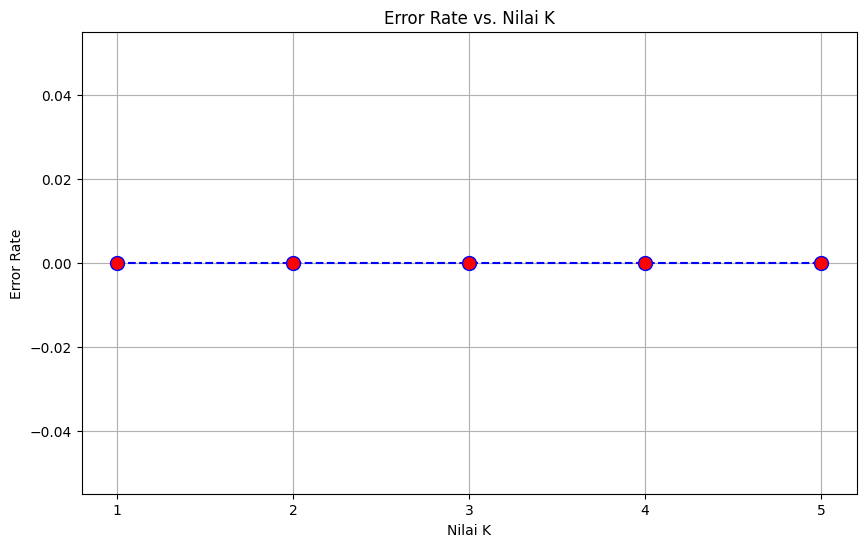

In [34]:
# Cell 5 (Perbaikan)
error_rate = []

# Tentukan jangkauan K yang valid: dari 1 hingga jumlah data latih
# Kita tidak bisa mencari K lebih banyak dari jumlah data yang kita punya
jangkauan_k = range(1, len(X_train)) # len(X_train) akan menghasilkan 6, jadi range-nya 1-5

# Melakukan iterasi untuk nilai K dalam jangkauan yang valid
for i in jangkauan_k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # Menghitung rata-rata error (dimana prediksi tidak sama dengan data aktual)
    error_rate.append(np.mean(pred_i != y_test))

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(jangkauan_k, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.xticks(jangkauan_k) # Memastikan sumbu-x menampilkan angka integer yang jelas
plt.show()

## Melatih model k-NN dan membuat Prediksi

In [35]:
# Membuat model k-NN dengan nilai K yang dipilih dari grafik (misal: 5)
k_optimal = 5
knn_model = KNeighborsClassifier(n_neighbors=k_optimal)

# Melatih model menggunakan data latih
knn_model.fit(X_train, y_train)

# Membuat prediksi menggunakan data uji
y_pred = knn_model.predict(X_test)

print(f"Prediksi berhasil dibuat dengan K={k_optimal}.")

Prediksi berhasil dibuat dengan K=5.


## evaluasi performa model

In [36]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}\n")

# Menampilkan Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n")

# Menampilkan Classification Report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi Model: 1.00

Confusion Matrix:
[[2]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
